In [25]:
# importing pandas and the standard python datetime module
import re
import pandas as pd
import numpy as np
import datetime as dt

# importing the data from the csv file
raw_crimes = pd.read_csv('crime-data-from-2010-to-present.csv')

# DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,
# Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,
# Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,
# Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,
# Crime Code 3,Crime Code 4,Address,Cross Street,Location

# janky regex
exp = re.compile(r"latitude': '([^']*)'.*longitude': '([^']*)'")

converted_crimes = raw_crimes.copy()
converted_crimes['Date Reported'] = pd.to_datetime(
    converted_crimes['Date Reported'])
converted_crimes['Date Occurred'] = pd.to_datetime(
    converted_crimes['Date Occurred'])
    
converted_crimes['Longitude'] = converted_crimes['Location '].apply(
    lambda x: float(exp.search(x).group(2) or 0))
converted_crimes['Latitude'] = converted_crimes['Location '].apply(
    lambda x: float(exp.search(x).group(1) or 0))

# resample the data to be weekly
# we map to DR Number since it isn't that important
crime_a_week_count = converted_crimes.resample('W', on='Date Occurred').agg({'DR Number': 'count'})
crime_a_week_count.rename(columns={'DR Number': 'Crime Count'}, inplace=True)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

c:\Users\61436\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\61436\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


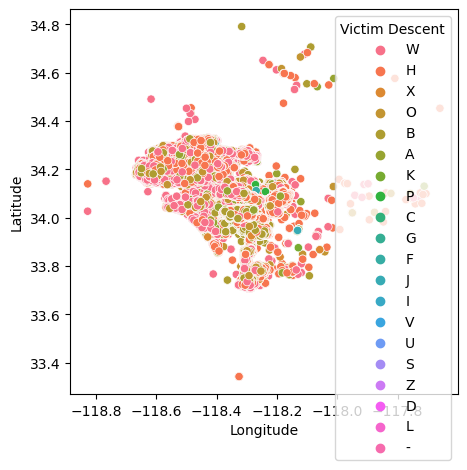

In [27]:
# location plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(data=converted_crimes[converted_crimes['Longitude'].abs() > 1],
                x='Longitude', y='Latitude', hue='Time Occurred')

1.0


Text(0.5, 1.0, 'Crimes in Los Angeles from 2010 to 2016 (weekly)')

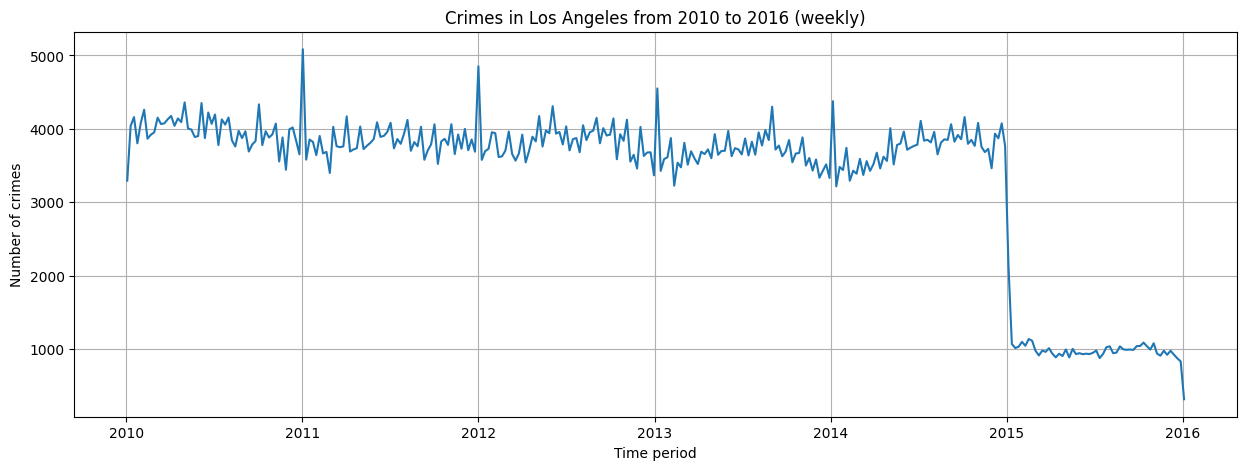

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# independent and dependent variables
X = crime_a_week_count.index.to_numpy().reshape(-1, 1)
y = crime_a_week_count['Crime Count'].to_numpy()

# split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_test, y_train, y_test = X, X, y, y

# training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# checking accuracy
print(accuracy_score(y_test, predictions))

